# Edge detection
Edge detection is considered to distinguish synthetic and natural images.
Natural images, which have greater sources of distortion and imperfect lighting, are expected to have a greater number of pixels detectable as edges.
This section will present the basic approach used including the training of models for hypothesis testing.
Subsequently the likelihood ratio test for image discrimination is presented and the correct classification rate is discussed.

## Approach
Gradient-based edge detection is used.
Pixels for which the gradient exceeds a fixed threshold are classified as edges.
The threshold is determined using a training set of 23 each synthetic and natural images.
The following figure shows normalized histograms of the pixel gradients across all images in the data sets.
Based on the histogram, a threshold value of 4 was chosen.
All pixels whose gradients exceed the threshold are classified as edges.

<img style="float: left;" src="img1.png">

The threshold is applied to the same training set.
For uniformity, each image is resized to $(540 \times 960)$ before it is processed, ensuring that differences in edge counts are not due to differences in size.
The number of edge pixels, as determined by the threshold on the gradient, is then totalled.
Applying this metric to the synthetic and natural images separately, a histogram for the number of edge pixels in the training images is obtained.
These histograms are shown in the following figure.

<img style="float: left;" src="img2.png">

The histograms are coarse because of the small size of the training sets.
However, they provide a means for determining a plausible probability density function (PDF) for the synthetic and natural image sets.
The histograms have very wide tails, so Cauchy distributions are fit to the data.
The Cauchy distributions for natural and synthetic images have the following parameters:

\begin{align}
\mathrm{scenes}: x_0 = 131700, \gamma = 52984.7 \\
\mathrm{synthetic}: x_0 = 35760.8, \gamma = 5377.61
\end{align}

Here, $x_0$ indicates the mean and $\gamma$ the scale parameter.
Having determined approximate distributions for the number of edges in the synthetic and natural images, it is a straightforward matter to apply a likelihood ratio test for a new candidate image to classify it as synthetic or natural.

## Likelihood ratio test and performance

The likelihood ratio test compares the lieklihood of the measured datum, $z$, for the two candidate hypothesis.
A Bayesian framework is incorporated, so we arbitrarily can choose "synthetic" as the null hypothesis and "natural" as the test hypothesis.
In the Bayesian framework, the likelihood ratio is as follows:

\begin{equation}
\frac{Pr(H_0)}{Pr(H_1)} \lessgtr \frac{p_0(z)}{p_1(z)}
\end{equation}

$Pr(H_i)$ indicates the probability of a hypothesis $H_i$ and $p_i(z)$ is the associated probability density function for the test statistic.
For simplicity, synthetic and natural images are treated as equally likely, so the likelihood ratio is compared to one.
The following figure shows the likelihood ratios for the synthetic and natural image sets.
The likelihood threshold based on the priors is plotted for comparison.
Clearly, the test is conservative with respect to synthetic images, and fails to detect all the natural scenes.
No doubt better performance could be obtained using larger training sets and a more refined edge detection scheme.

<img style="float: left;" src="img3.png">

Using equal priors, there are zero false positives out of ninety-nine synthetic images and seven false negatives out of fifty-six natural scenes.
This is a total error rate of just about 4.5% for the whole data set.
It should be noted that the test set includes the images used in training the statistics for the Cauchy distributions.

To use this file, the relative filepath to the root image directory must be: ../../ECEN662_project_images
 ** Load training images to determine an appropriate gradient threshold for edge detection


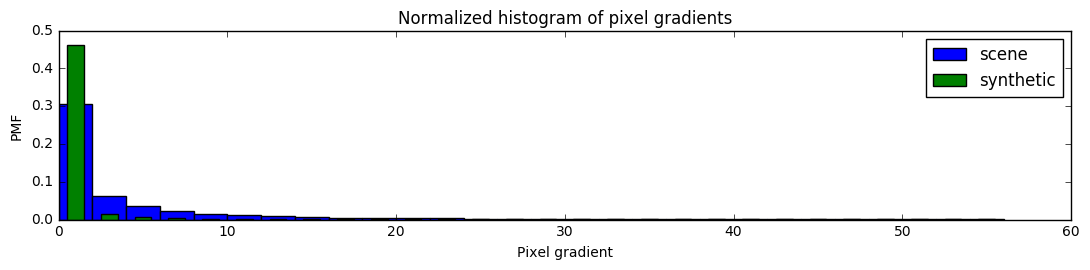

 ** Generate histograms of the edge length in the data
Cauchy distribution for scenes: loc=131706.455316, scale=52984.681028
Cauchy distribution for synthetic: loc=35760.832624, scale= 5377.609552


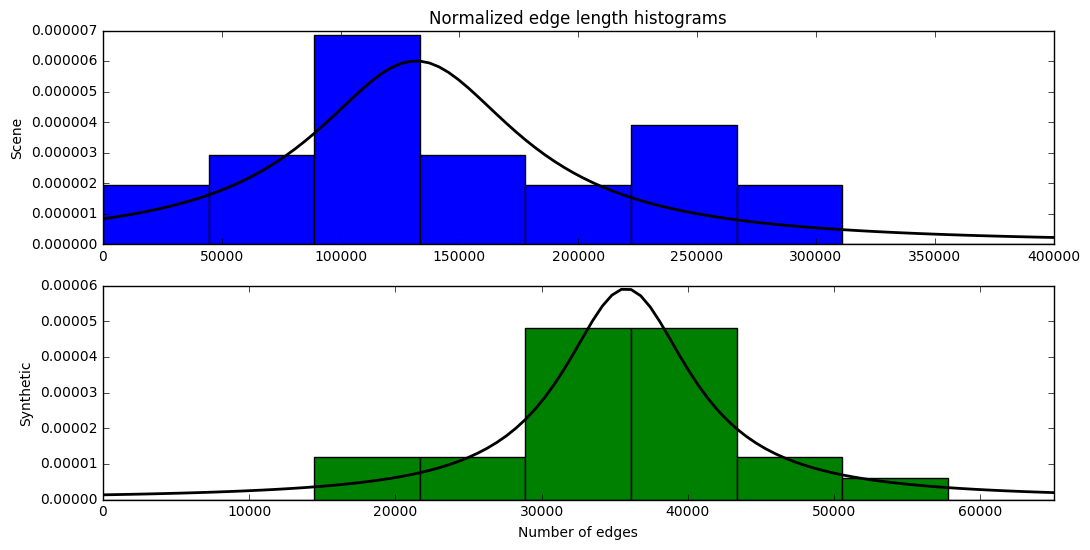

 ** Evaluate the performance of the proposed test on the non-training data
0 false postives out of 76
3 false negatives out of 32
 ** Load all images and compute the likelihood ratios for each data set
0 false postives out of 99
7 false negatives out of 55


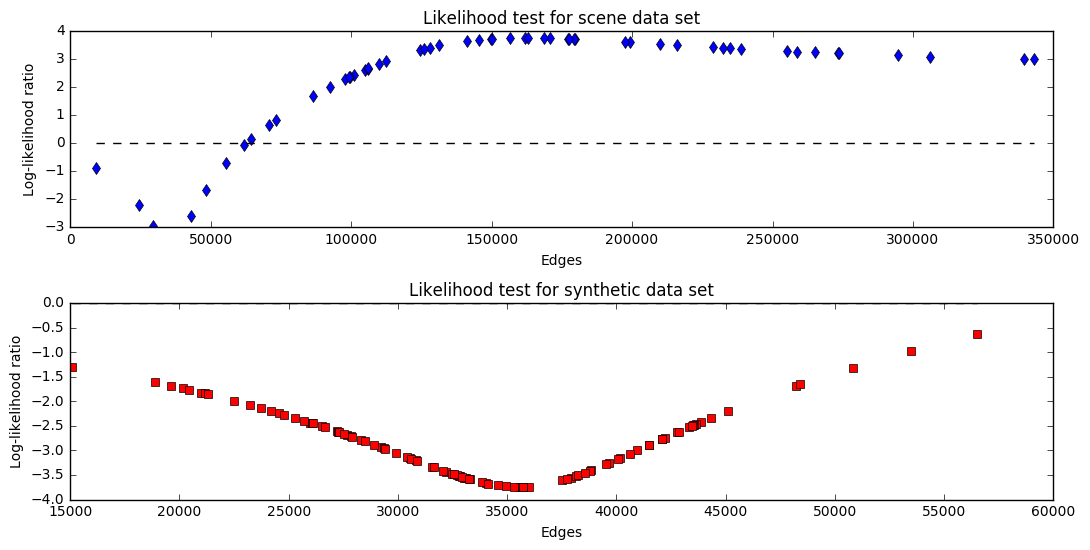

 ** Done


In [1]:
# -*- coding: utf-8 -*-
"""
Created on Mon Feb 27 20:12:07 2017

@author: fatadama
@brief: Main code for edge detection test
"""
import numpy as np
from loadImg import *
import matplotlib.pyplot as plt
from time import sleep
from scipy import stats

# GLOBAL: training set size
TrainingSize = 23
# FIG WIDTH (total width)
figwidth = 11.0
# FIG HEIGHT (per subplot)
figheight = 2.8
# fontsize
fontsize = 12

scale_scene = 52984.7
loc_scene = 131700
scale_synthetic = 5377.61
loc_synthetic = 35760.8

def tryEdgeDetection():
    """ Load the training set of scenes and synthetic images and plot
    histograms of the gradients for each case
    
    Used to determine a threshold for edge detection
    """
    bins = np.arange(0.0,56.0001,2)
    barx = np.diff(bins)*0.5 + bins[:-1]
    binwidth = np.mean(np.diff(bins))
    
    sz = [540,960]
    
    fig,ax = plt.subplots(1,1,figsize=(figwidth,figheight))
    
    valSynthetic = np.zeros((TrainingSize,sz[0],sz[1]))
    valScene = np.zeros((TrainingSize,sz[0],sz[1]))
    for h in range(TrainingSize):
        im = im2intensity(loadSynthetic(h+1,sz=sz))
        valSynthetic[h,:,:] = np.gradient(im)[0]
    for h in range(TrainingSize):        
        im = im2intensity(loadScene(h+1,sz=sz))
        valScene[h,:,:] = np.gradient(im)[0]
    
    barSynthetic = np.histogram(valSynthetic,bins,normed=True)[0]
    barScene = np.histogram(valScene,bins,normed=True)[0]
    
    scene = ax.bar(bins[:-1],barScene,width=binwidth,color='blue')
    synthetic = ax.bar(bins[:-1]+0.25*binwidth,barSynthetic,width=0.5*binwidth,color='green')
    ax.legend((scene[0],synthetic[0]),('scene','synthetic'))
    ax.set_title('Normalized histogram of pixel gradients')
    ax.set_xlabel('Pixel gradient')
    ax.set_ylabel('PMF')
    plt.tight_layout()
        
    plt.show()
    
def edgeLength():
    """
    Using a hard-coded threshold value, do edge detection. 
    Create normalized histograms of the number of edges for the training set.
    """
    # threshold
    thres = 4.0
    # size to rescale all images to
    sz = [540,960]
    
    valSynthetic = np.zeros((TrainingSize,))
    valScene = np.zeros((TrainingSize,))
    # loop over synthetic
    for h in range(TrainingSize):
        im = im2intensity(loadSynthetic(h+1,sz=sz))
        gra = np.gradient(im)[0]
        valSynthetic[h] = len(np.where(np.abs(gra) > thres)[0])
    # loop over scenes
    for h in range(TrainingSize):        
        im = im2intensity(loadScene(h+1,sz=sz))
        gra = np.gradient(im)[0]
        valScene[h] = len(np.where(np.abs(gra) > thres)[0])
    
    # fit distributions to data
    scenefit = stats.cauchy.fit(valScene)
    syntheticfit = stats.cauchy.fit(valSynthetic)
    print("Cauchy distribution for scenes: loc=%12.6f, scale=%12.6f" % (scenefit[0],scenefit[1]))
    print("Cauchy distribution for synthetic: loc=%12.6f, scale=%12.6f" % (syntheticfit[0],syntheticfit[1]))
    
    fig,ax = plt.subplots(2,1,figsize=(figwidth,figheight*2))
    
    bins = np.linspace(0.0,400000,10)
    barx = np.diff(bins)*0.5 + bins[:-1]
    binwidth = np.mean(np.diff(bins))
    xpdf = np.linspace(bins[0],bins[-1],100)
    barScene = np.histogram(valScene,bins,normed=True)[0]
    
    ax[0].bar(bins[:-1],barScene,width=binwidth,color='blue')
    #ax[0].hist(valScene,rwidth=1,normed=True)
    ax[0].plot(xpdf,stats.cauchy.pdf(xpdf,loc=scenefit[0],scale=scenefit[1]),'k-',linewidth=2)
    ax[0].set_xlim((bins[0],bins[-1]))
    ax[0].set_ylabel('Scene')
    ax[0].set_title('Normalized edge length histograms')
    #ax[0].tick_params(labelsize=fontsize)
    plt.tight_layout()
    
    bins = np.linspace(0,65000,10)
    barx = np.diff(bins)*0.5 + bins[:-1]
    binwidth = np.mean(np.diff(bins))   
    xpdf = np.linspace(bins[0],bins[-1],100)
    barSynthetic = np.histogram(valSynthetic,bins,normed=True)[0]
    ax[1].bar(bins[:-1],barSynthetic,width=binwidth,color='green')
    ax[1].plot(xpdf,stats.cauchy.pdf(xpdf,loc=syntheticfit[0],scale=syntheticfit[1]),'k-',linewidth=2)
    ax[1].set_xlim((bins[0],bins[-1]))
    ax[1].set_xlabel('Number of edges')
    ax[1].set_ylabel('Synthetic')
    plt.tight_layout()
    #ax[1].hist(valSynthetic,rwidth=1,normed=True)
        
    plt.show()
    
def edgeTrialIm(im,threshold=1.0):
    """ Use the edge detection criterion to classify an image as synthetic (0)
    or natural (1)
    
    Parameters
    ----
    im : 2D array
        a greyscale image, must already be resized to desired size
    threshold : float
        the likelihood ratio == pi0/pi1
    Returns
    ----
    out : bool
        0 == synthetic, 1 == scene
    likelihood : float
        the likelihood ratio
    z : float
        the number of edge pixels
    """
    thres = 4.0
    gra = np.gradient(im)[0]
    count = len(np.where(np.abs(gra) > thres)[0])
    p0 = stats.cauchy.pdf(count,scale=scale_synthetic,loc=loc_synthetic)
    p1 = stats.cauchy.pdf(count,scale=scale_scene,loc=loc_scene)
    likelihood = float(p1)/float(p0)
    if likelihood >= threshold:
        return (1,likelihood,count)
    else:
        return (0,likelihood,count)
    
def trialEdgeLength():
    """
    Loop over all values not in the training set. Classify as synthetic or
    scene using edge detection test and report number of false positives and
    negatives.
    
    Uses equal priors.
    """
    # null hypothesis: normal with scale=38192,loc = 8817
    # alternate hypothesis: cauchy with 153595, loc = 45142

    thres = 4.0    
        
    sz = [540,960]
        
    testingSize0 = 99-TrainingSize
    testingSize1 = len(SceneList)-TrainingSize
    
    valSynthetic = np.zeros((testingSize0,))
    valScene = np.zeros((testingSize1,))
    for h in range(testingSize0):
        im = im2intensity(loadSynthetic(h+TrainingSize,sz=sz))
        gra = np.gradient(im)[0]
        valSynthetic[h] = len(np.where(np.abs(gra) > thres)[0])
    for h in range(testingSize1):
        im = im2intensity(loadScene(h+TrainingSize,sz=sz))
        gra = np.gradient(im)[0]
        valScene[h] = len(np.where(np.abs(gra) > thres)[0])

    # null hypothesis: synthetic    
    p00 = stats.cauchy.pdf(valSynthetic,scale=scale_synthetic,loc=loc_synthetic)
    p01 = stats.cauchy.pdf(valScene,scale=scale_synthetic,loc=loc_synthetic)
    # test hypothesis: scene
    p10 = stats.cauchy.pdf(valSynthetic,scale=scale_scene,loc=loc_scene)
    p11 = stats.cauchy.pdf(valScene,scale=scale_scene,loc=loc_scene)
    
    l0 = p10/p00
    l1 = p11/p01
    
    w0 = np.where(l0 > 1)[0]
    w1 = np.where(l1 < 1)[0]
    
    print("%d false postives out of %d" % (len(w0),len(l0)))
    print("%d false negatives out of %d" % (len(w1),len(l1)))
    """
    fig,ax = plt.subplots(2,1)
    ax[0].plot(valSynthetic,p00,'gx')
    ax[0].plot(valSynthetic,p10,'bd')
    
    ax[1].plot(valScene,p01,'gx')
    ax[1].plot(valScene,p11,'bd')
    
    plt.show()
    """
    return

def edgeTrialCompare():
    """ Compare the likelihood ratios of the two data sets for different values
    of the likelihood threshold
    """
    
    # equal priors
    thres2 = 1.0
    logthres2 = np.log(thres2)
    # unequal priors: prob(synthetic)/prob(scene)
    thres1 = 99.0/float(len(SceneList))
    
    sz = (540,960)
    
    sceneLikelihoods = np.zeros((len(SceneList),))
    xScene = np.zeros((len(SceneList),))
    vScene = np.zeros((len(SceneList),))
    for h in range(len(SceneList)):
        im = im2intensity(loadScene(h+1,sz=sz))
        (vScene[h],sceneLikelihoods[h],xScene[h]) = edgeTrialIm(im,thres2)
    syntheticLikelihoods = np.zeros((99,))
    xSynthetic = np.zeros((99,))
    vSynthetic = np.zeros((99,))
    for h in range(99):
        im = im2intensity(loadSynthetic(h+1,sz=sz))
        (vSynthetic[h],syntheticLikelihoods[h],xSynthetic[h]) = edgeTrialIm(im,thres2)
    print("%d false postives out of %d" % (np.sum(vSynthetic > 0),len(vSynthetic)))
    print("%d false negatives out of %d" % (np.sum(vScene < 1),len(vScene)))
    
    fig,ax = plt.subplots(2,1,figsize=(figwidth,figheight*2))
    ax[0].plot(xScene,np.log(sceneLikelihoods),'bd')
    ax[0].plot([np.min(xScene),np.max(xScene)],[logthres2,logthres2],'k--')
    ax[0].set_title('Likelihood test for scene data set')
    ax[0].set_xlabel('Edges')
    ax[0].set_ylabel('Log-likelihood ratio')
    plt.tight_layout()
    
    ax[1].plot(xSynthetic,np.log(syntheticLikelihoods),'rs')
    ax[1].plot([np.min(xSynthetic),np.max(xSynthetic)],[logthres2,logthres2],'k--')
    ax[1].set_title('Likelihood test for synthetic data set')
    ax[1].set_xlabel('Edges')
    ax[1].set_ylabel('Log-likelihood ratio')
    plt.tight_layout()
    plt.show()

if __name__ == '__main__':
    print(" ** Load training images to determine an appropriate gradient threshold" \
        " for edge detection")
    tryEdgeDetection()
    sleep(3)
    print(" ** Generate histograms of the edge length in the data")
    edgeLength()
    sleep(3)
    print(" ** Evaluate the performance of the proposed test on the non-training data")
    trialEdgeLength()
    sleep(3)
    print(" ** Load all images and compute the likelihood ratios for each data set")
    edgeTrialCompare()
    sleep(3)
    print(" ** Done")